In [1]:
#!pip install sklearn
#!pip install seaborn
#!pip install textblob
#!pip install twython

In [2]:
import numpy as np
import pandas as pd
from textblob import TextBlob
from twython import Twython
import re
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_tweet_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [4]:
def get_tweet(q):
    app_key = '#'
    app_secret = '#'
    oauth_token = '#'
    oauth_token_secret = '#'
    try:
        t = Twython(app_key=app_key, app_secret=app_secret, oauth_token=oauth_token, oauth_token_secret=oauth_token_secret)
        search =t.search(q=q,count=200,since=2020-11-15)
        fetched_tweets = search['statuses']
        text=[]
        for i in fetched_tweets:
            text.append(i.get('text'))
        sentiment=[]
        for tweet in text:
            sentiment.append(get_tweet_sentiment(tweet))
        subjectivity=[]
        for tweet in text:
            subjectivity.append(getSubjectivity(tweet))
        polarity=[]
        for tweet in text:
            polarity.append(getPolarity(tweet))

    except:
        print("error")
    ptweets = [tweet for tweet in sentiment if tweet == 'positive']
    ntweets = [tweet for tweet in sentiment if tweet == 'negative']
    positive_tweet=int(100*len(ptweets)/len(sentiment))
    negative_tweets=int(100*len(ntweets)/len(sentiment))
    neutral_tweets=int(100*(len(sentiment) - len(ntweets) - len(ptweets))/len(sentiment))
    return text,sentiment,positive_tweet,negative_tweets,neutral_tweets,subjectivity,polarity


In [5]:
text_trump,sentiment_trump,x1,y1,z1,subjectivity_trump,polarity_trump=get_tweet('donald trump')
text_biden,sentiment_biden,x2,y2,z2,subjectivity_biden,polarity_biden=get_tweet('joe biden')

In [6]:
df_trump=pd.DataFrame()
df_trump['text']=text_trump
df_trump['sentiment']=sentiment_trump
df_trump['Subjectivity']=subjectivity_trump
df_trump['polarity']=polarity_trump
%matplotlib inline
print(len(df_trump))
print(x1)
df_trump

100
29


,text,sentiment,Subjectivity,polarity
0,@TheRickWilson Kriss Kross tried this publicit...,neutral,0.000000,0.000000
1,@Blockworks_ @LJMoynihan https://t.co/TCmxlga838,neutral,0.000000,0.000000
2,"RT @JackPosobiec: ""Not teaching your kids abou...",neutral,0.000000,0.000000
3,@Sen_JoeManchin is just another Trump lacy! St...,neutral,0.000000,0.000000
4,RT @DonaldJTrumpJr: Joe Biden’s greatest accom...,positive,0.650000,0.683333
...,...,...,...,...
95,RT @MARCELOFAVAOK: El tiempo le esta dando la ...,neutral,0.000000,0.000000
96,RT @globaltimesnews: Responding to former US p...,neutral,0.000000,0.000000
97,RT @SPECNews1BUF: More Americans approve of th...,positive,0.500000,0.500000
98,RT @emilyposterior: I’m pretty sure all my fol...,positive,0.796296,0.416667


<AxesSubplot:>

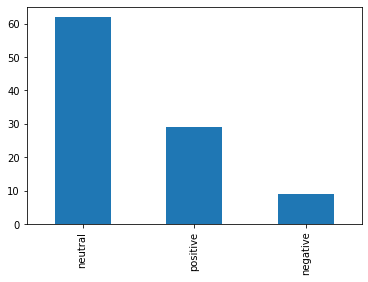

In [7]:
df_trump['sentiment'].value_counts().plot(kind='bar')


In [8]:
df_biden=pd.DataFrame()
df_biden['text']=text_biden
df_biden['sentiment']=sentiment_biden
df_biden['Subjectivity']=subjectivity_biden
df_biden['polarity']=polarity_biden
print(x2)
df_biden

32


,text,sentiment,Subjectivity,polarity
0,RT @JohnCollins_KP: I've never seen a golden s...,negative,0.700000,-0.150000
1,RT @lavern_spicer: Joe Biden and Kamala Harris...,neutral,0.000000,0.000000
2,RT @lavern_spicer: Joe Biden and Kamala Harris...,neutral,0.000000,0.000000
3,"RT @JunkScience: Joe Biden wants to build 2,00...",negative,0.575000,-0.125000
4,RT @SenTedCruz: Peace was flowering in the Mid...,neutral,0.000000,0.000000
...,...,...,...,...
94,RT @JohnCollins_KP: I've never seen a golden s...,negative,0.700000,-0.150000
95,RT @Mandoline_Blue: So the Aids cut stays. Wha...,neutral,0.000000,0.000000
96,RT @dril_gpt2: theres a new show on tlc called...,positive,0.454545,0.136364
97,RT @DonaldJTrumpJr: Guys thought some of you m...,positive,0.066667,0.033333


<AxesSubplot:>

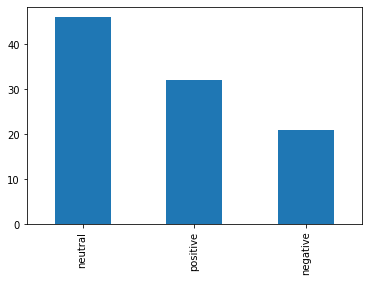

In [9]:
df_biden['sentiment'].value_counts().plot(kind='bar')

### TO CHECK FOR ANY MISSING VALUES

In [10]:
df_trump.isnull().sum()

text            0
sentiment       0
Subjectivity    0
polarity        0
dtype: int64

In [11]:
df_biden.isnull().sum()

text            0
sentiment       0
Subjectivity    0
polarity        0
dtype: int64

## 2 : Positive, 1 : Negative ,0 : Neutral

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_trump['sentiment']=lb.fit_transform(df_trump['sentiment'])
df_trump['Candidate'] = 'trump'
df_trump

,text,sentiment,Subjectivity,polarity,Candidate
0,@TheRickWilson Kriss Kross tried this publicit...,1,0.000000,0.000000,trump
1,@Blockworks_ @LJMoynihan https://t.co/TCmxlga838,1,0.000000,0.000000,trump
2,"RT @JackPosobiec: ""Not teaching your kids abou...",1,0.000000,0.000000,trump
3,@Sen_JoeManchin is just another Trump lacy! St...,1,0.000000,0.000000,trump
4,RT @DonaldJTrumpJr: Joe Biden’s greatest accom...,2,0.650000,0.683333,trump
...,...,...,...,...,...
95,RT @MARCELOFAVAOK: El tiempo le esta dando la ...,1,0.000000,0.000000,trump
96,RT @globaltimesnews: Responding to former US p...,1,0.000000,0.000000,trump
97,RT @SPECNews1BUF: More Americans approve of th...,2,0.500000,0.500000,trump
98,RT @emilyposterior: I’m pretty sure all my fol...,2,0.796296,0.416667,trump


In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_biden['sentiment']=lb.fit_transform(df_biden['sentiment'])
df_biden['Candidate'] = 'biden'
df_biden

,text,sentiment,Subjectivity,polarity,Candidate
0,RT @JohnCollins_KP: I've never seen a golden s...,0,0.700000,-0.150000,biden
1,RT @lavern_spicer: Joe Biden and Kamala Harris...,1,0.000000,0.000000,biden
2,RT @lavern_spicer: Joe Biden and Kamala Harris...,1,0.000000,0.000000,biden
3,"RT @JunkScience: Joe Biden wants to build 2,00...",0,0.575000,-0.125000,biden
4,RT @SenTedCruz: Peace was flowering in the Mid...,1,0.000000,0.000000,biden
...,...,...,...,...,...
94,RT @JohnCollins_KP: I've never seen a golden s...,0,0.700000,-0.150000,biden
95,RT @Mandoline_Blue: So the Aids cut stays. Wha...,1,0.000000,0.000000,biden
96,RT @dril_gpt2: theres a new show on tlc called...,2,0.454545,0.136364,biden
97,RT @DonaldJTrumpJr: Guys thought some of you m...,2,0.066667,0.033333,biden


## ELECTION PREDICTION BASED ON THE ANALYSIS

### Concatenating all three candidate's tweets

In [14]:
df1 = pd.concat([df_trump,df_biden])

In [15]:
df1.shape

(199, 5)

In [16]:
df1['Candidate'].value_counts()

trump    100
biden     99
Name: Candidate, dtype: int64

In [17]:
df1['sentiment'].value_counts()

1    108
2     61
0     30
Name: sentiment, dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


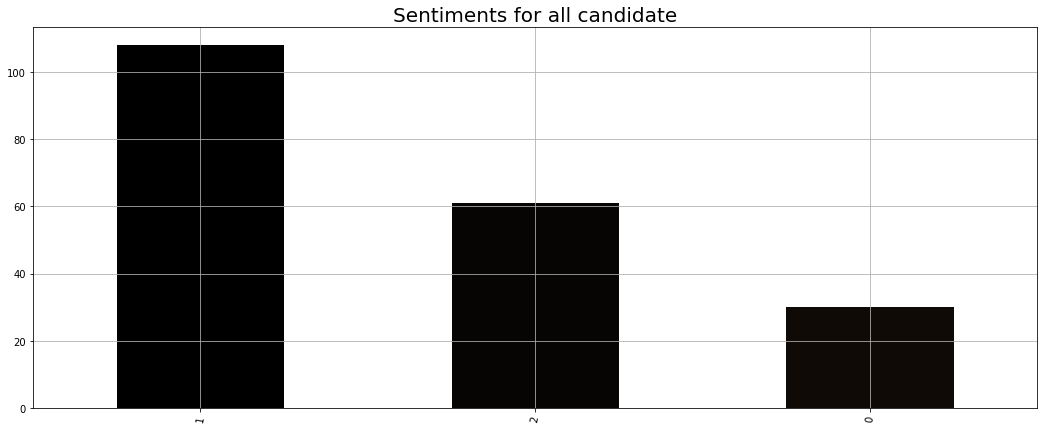

In [19]:
#2 : Positive, 1 : Negative ,0 : Neutral
# visualization by frequency table
plt.rcParams['figure.figsize'] = (18,7)
color = plt.cm.copper(np.linspace(0, 1, 40)) #Returns number spaces evenly w.r.t interval. Similar to arange but instead of step it uses sample number.
df1['sentiment'].value_counts().head(40).plot.bar(color = color)
plt.title('Sentiments for all candidate', fontsize = 20)
plt.xticks(rotation = 80 )
plt.grid()
plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

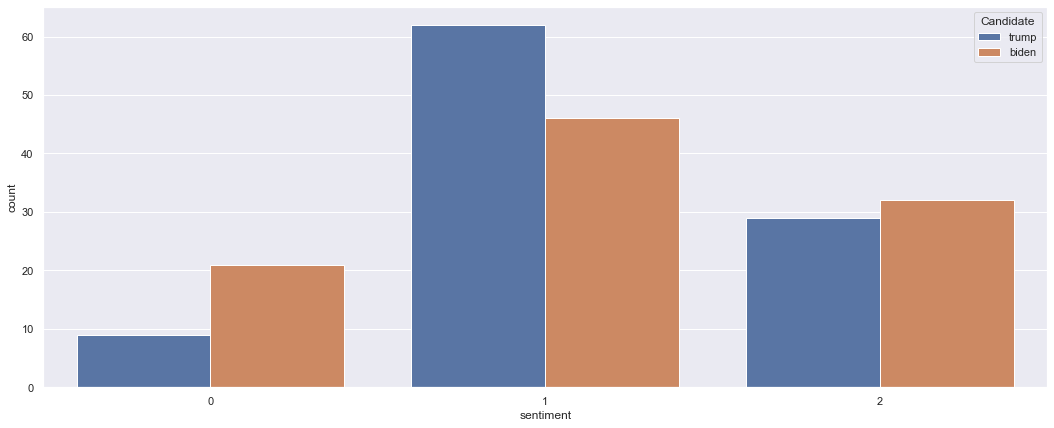

In [20]:
import seaborn as sns
sns.set(style="darkgrid",color_codes = "g")
sns.countplot(x="sentiment",hue = 'Candidate', data=df1)

In [21]:
def prediction():
    points=[x1,x2]
    points.sort()
    max = points[1]
    if max == x1:
        print('winner is trump')
    else:
        print('winner is biden')


In [22]:
prediction()

winner is biden


### PREPROCESSING TRUMP TWEETS

In [23]:
import re
first_text_trump=df_trump.text[0]
text_re_trump=re.sub(r"RT @[\w]*:","",first_text_trump)
text_re_trump=re.sub(r"https?://[^a-zA-Z]"," ",first_text_trump) #changing characters with space
text_re_trump=re.sub(r'^https?:\/\/.*[\r\n]*', '', first_text_trump, flags=re.MULTILINE)
text_re_trump=re.sub(r"http\S+|www\S+|https:\S+", '', first_text_trump)
text_re_trump=re.sub(r'\@\w+|\#','',first_text_trump)
text_re_trump=text_re_trump.lower()
text_re_trump

' kriss kross tried this publicity stunt back in the 90\'s. donald trump does not make anyone want to "… https://t.co/1u0j4jxbba'

In [24]:
#!pip install nltk

In [25]:
import warnings
warnings.filterwarnings('ignore')
import nltk
#nltk.download('punkt')
from nltk.corpus import stopwords
text_re_trump=nltk.word_tokenize(text_re_trump) #separate all words
text_re_trump

['kriss',
 'kross',
 'tried',
 'this',
 'publicity',
 'stunt',
 'back',
 'in',
 'the',
 '90',
 "'s",
 '.',
 'donald',
 'trump',
 'does',
 'not',
 'make',
 'anyone',
 'want',
 'to',
 '``',
 '…',
 'https',
 ':',
 '//t.co/1u0j4jxbba']

In [26]:
import nltk as nlp
import nltk
#nltk.download('wordnet')
lemma=nlp.WordNetLemmatizer()
text_re_trump=[lemma.lemmatize(i) for i in text_re_trump]
text_re_trump=" ".join(text_re_trump)
text_re_trump

"kris kross tried this publicity stunt back in the 90 's . donald trump doe not make anyone want to `` … http : //t.co/1u0j4jxbba"

In [27]:
import nltk as nlp
text_list=[]
for i in df_trump.text:
    text_re_trump=re.sub("[^a-zA-Z]"," ",i)
    text_re_trump=text_re_trump.lower()
    text_re_trump=nltk.word_tokenize(text_re_trump)
    lemma=nlp.WordNetLemmatizer()
    text_re_trump=[lemma.lemmatize(word) for word in text_re_trump]
    text_re_trump=" ".join(text_re_trump)
    text_list.append(text_re_trump)
text_list[:100]


['therickwilson kris kross tried this publicity stunt back in the s donald trump doe not make anyone want to http t co u j jxbba',
 'blockworks ljmoynihan http t co tcmxlga',
 'rt jackposobiec not teaching your kid about money is like not caring whether they eat if they enter the world without financial knowle',
 'sen joemanchin is just another trump lacy still doing the bidding of donald trump and the republican he wa ele http t co yih ll k g',
 'rt donaldjtrumpjr joe biden s greatest accomplishment will be showing american how great donald trump really wa',
 'rt jackposobiec not teaching your kid about money is like not caring whether they eat if they enter the world without financial knowle',
 'rt jfrusci cheney on the axe file podcast i think what donald trump did is the most dangerous thing the most egregious violation of a',
 'rt viczuri donald trump felicita al equipo que realiza la auditorium de maricopa en arizona y denuncia de nuevo el enga o electoral',
 'atrupar when donald

In [28]:
#bag of words
# COUNT VECTORIZER

from sklearn.feature_extraction.text import CountVectorizer
max_features=100
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparse_matrix= cou_vec.fit_transform(text_list).toarray()


In [29]:
Y = df_trump.iloc[:,1].values
X = sparse_matrix
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

In [30]:
Y

array([1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2])

In [31]:
X

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
print(X.shape)
print(Y.shape)

(100, 100)
(100,)


In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(70, 100)
(30, 100)
(70,)
(30,)


### HERE WE ARE APPLYING RANDOM FOREST CLASSIFIER TO GET ACCURACY OF PREDICTION

In [34]:
from sklearn.metrics import accuracy_score

### ACCURACY FOR TRUMP TWEETS

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)
RF = accuracy_score(y_pred_rf,Y_test)
print("\nRF classifier:-",round(accuracy_score(Y_test,y_pred_rf)*100))


RF classifier:- 73


### PREPROCESSING BIDEN TWEETS

In [36]:
import re
first_text_biden=df_biden.text[0]
text_re_biden=re.sub(r"RT @[\w]*:","",first_text_biden)
text_re_biden=re.sub(r"https?://[^a-zA-Z]"," ",first_text_biden) #changing characters with space
text_re_biden=re.sub(r'^https?:\/\/.*[\r\n]*', '', first_text_biden, flags=re.MULTILINE)
text_re_biden=re.sub(r"http\S+|www\S+|https:\S+", '', first_text_biden)
text_re_biden=re.sub(r'\@\w+|\#','',first_text_biden)
text_re_biden=text_re_biden.lower()
text_re_biden

"rt : i've never seen a golden statue of joe biden, because democrats aren't batshit crazy."

In [37]:
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
text_re_biden=nltk.word_tokenize(text_re_biden) 
text_re_biden

['rt',
 ':',
 'i',
 "'ve",
 'never',
 'seen',
 'a',
 'golden',
 'statue',
 'of',
 'joe',
 'biden',
 ',',
 'because',
 'democrats',
 'are',
 "n't",
 'batshit',
 'crazy',
 '.']

In [38]:
import nltk as nlp
import nltk
#nltk.download('wordnet')
lemma=nlp.WordNetLemmatizer()
text_re_biden=[lemma.lemmatize(i) for i in text_re_biden]
text_re_biden=" ".join(text_re_biden)
text_re_biden

"rt : i 've never seen a golden statue of joe biden , because democrat are n't batshit crazy ."

In [39]:
import nltk as nlp
text_list=[]
for i in df_biden.text:
    text_re_biden=re.sub("[^a-zA-Z]"," ",i)
    text_re_biden=text_re_biden.lower()
    text_re_biden=nltk.word_tokenize(text_re_biden)
    lemma=nlp.WordNetLemmatizer()
    text_re_biden=[lemma.lemmatize(word) for word in text_re_biden]
    text_re_biden=" ".join(text_re_biden)
    text_list.append(text_re_biden)
text_list[:100]

['rt johncollins kp i ve never seen a golden statue of joe biden because democrat aren t batshit crazy',
 'rt lavern spicer joe biden and kamala harris didn t post about dday because they are the fascist that we fought against',
 'rt lavern spicer joe biden and kamala harris didn t post about dday because they are the fascist that we fought against',
 'rt junkscience joe biden want to build ugly offshore wind turbine offshore wind is about the most expensive form of electr',
 'rt sentedcruz peace wa flowering in the middle east but that changed once joe biden decided to undermine our ally israel send mi',
 'rt msnbc pres biden want to fix the nation s teacher shortage educator say the problem is worsening http t co gyopxtuuoj',
 'rt kylegriffin house progressive are getting fed up with effort to accommodate republican senator and joe manchin look for them to',
 'rt davidmweissman question for fellow floridian ha our governor ron desantis recognized joe biden a president yet',
 'he is a

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=100
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparse_matrix= cou_vec.fit_transform(text_list).toarray()

In [41]:
Y = df_biden.iloc[:,1].values
X = sparse_matrix
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

In [42]:
Y

array([0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1,
       2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1])

In [43]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
print(X.shape)
print(Y.shape)

(99, 100)
(99,)


In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(69, 100)
(30, 100)
(69,)
(30,)


### ACCURACY FOR BIDEN TWEETS

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)
RF = accuracy_score(y_pred_rf,Y_test)
print("\nRF classifier:-",round(accuracy_score(Y_test,y_pred_rf)*100))


RF classifier:- 70


In [47]:
#!pip install wordcloud

In [48]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.savefig('txt.png',facecolor='k',bbox_inches='tight')

### WORDCLOUD FOR TRUMP

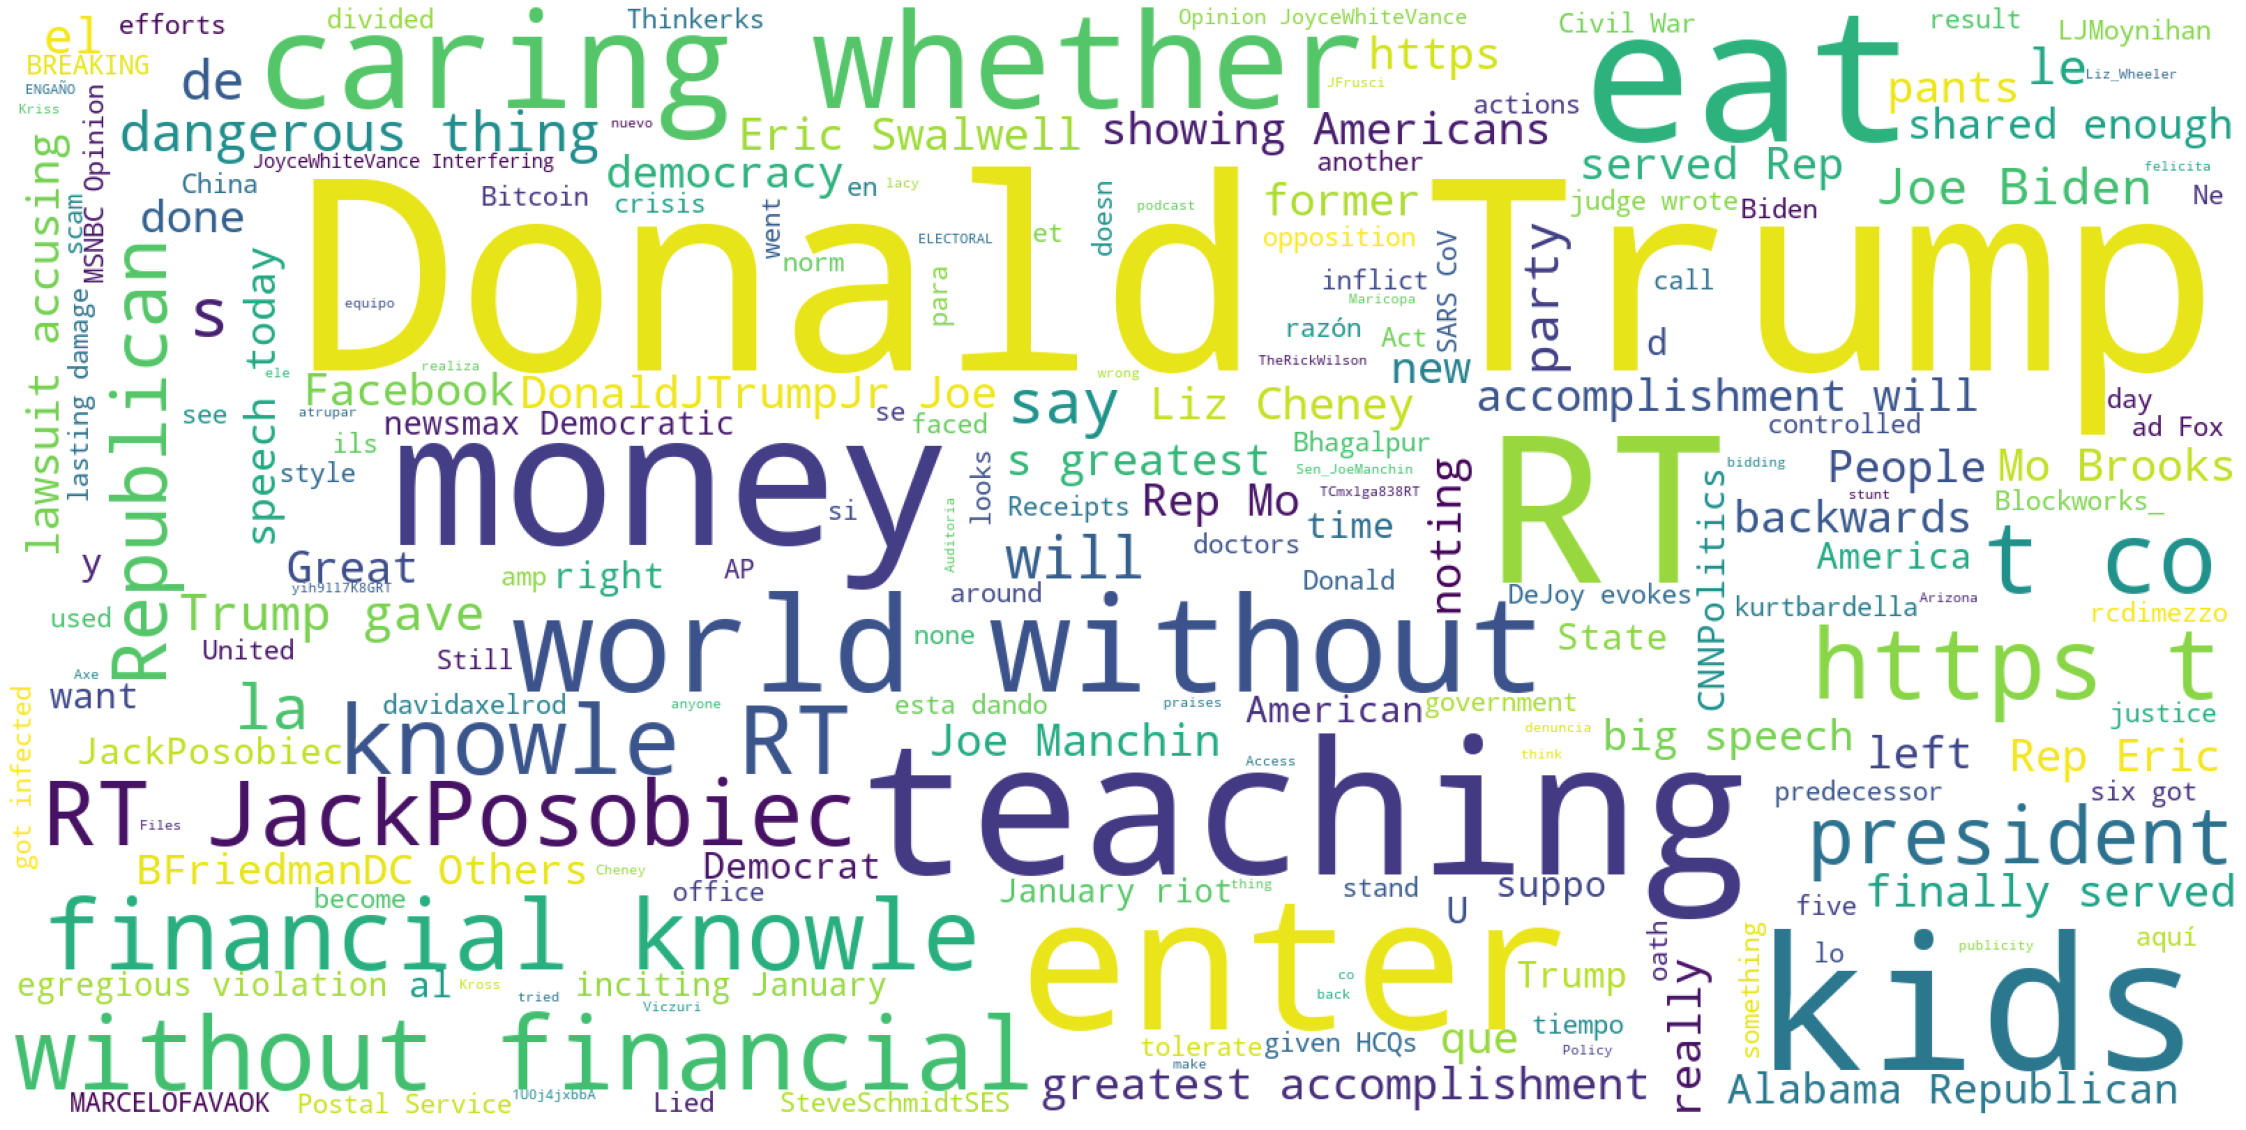

In [49]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
txt=''.join(df_trump['text'].tolist())
#wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(txt)
wordcloud= WordCloud(background_color="white",width=1600,height=800,stopwords = STOPWORDS).generate(txt)
plot_cloud(wordcloud)

### WORDCLOUD FOR BIDEN TWEETS

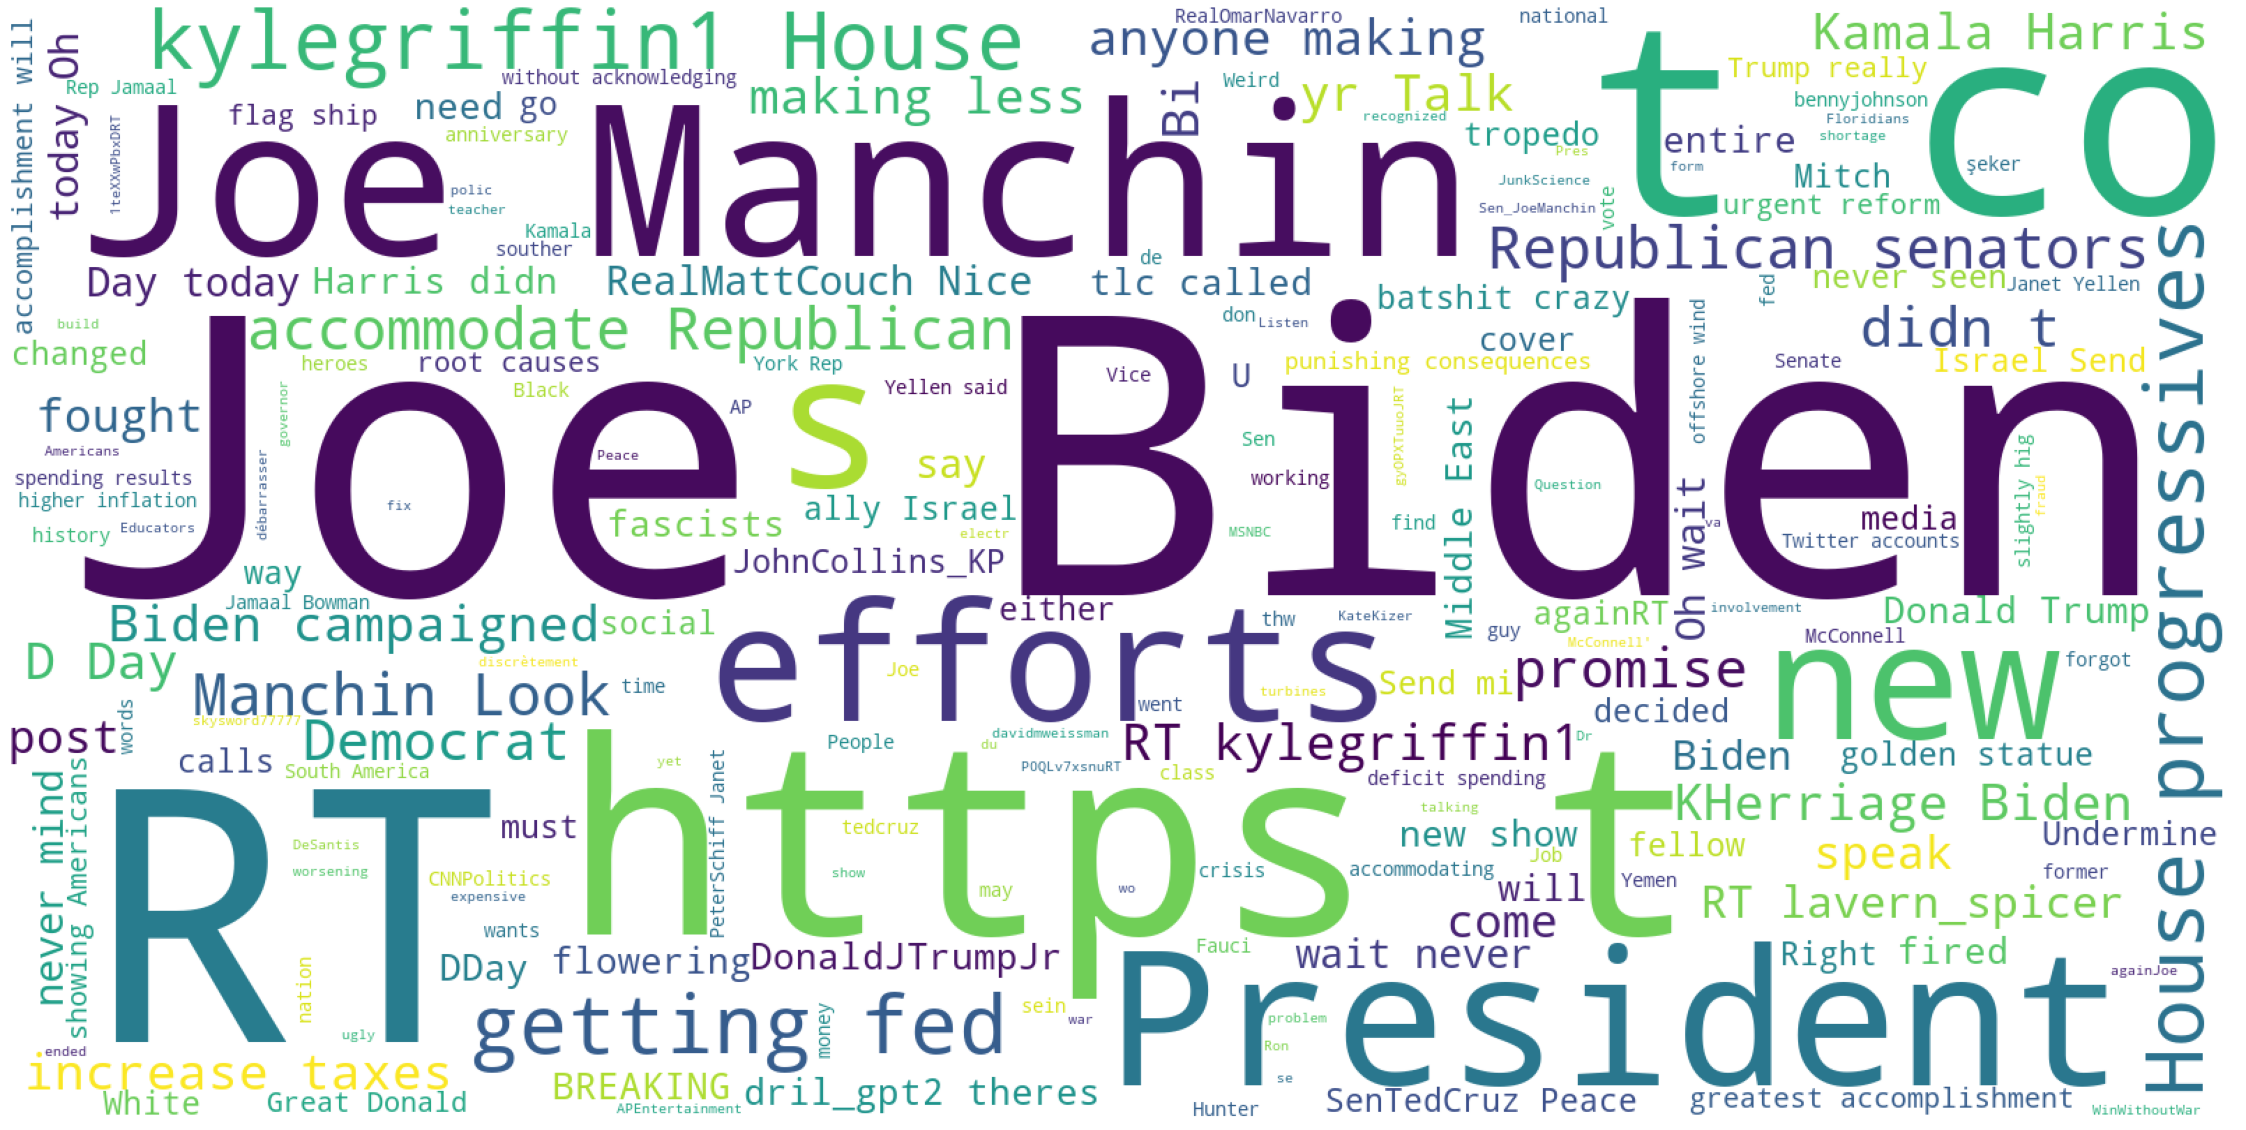

In [50]:
txt=''.join(df_biden['text'].tolist())
#wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(txt)
wordcloud= WordCloud(background_color="white",width=1600,height=800,stopwords = STOPWORDS).generate(txt)
plot_cloud(wordcloud)